In [19]:
import numpy as np
import os
import pandas as pd
import random
from collections import defaultdict
import gym
import matplotlib.pyplot as plt
from utils import gen_wrapped_env, show_video

class QLearning:
    def __init__(self, actions, agent_indicator = 10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.1
        self.gamma = 0.8
        self.epsilon = 0.3
        self.q_values = defaultdict(lambda: [0.0] * actions)
    
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]

    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)

        current_q = self.q_values[state][action]
        next_max_q = max(self.q_values[next_state])
        
        td_error = reward + self.gamma * next_max_q - current_q
        self.q_values[state][action] = current_q + self.alpha * td_error
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action
    
env = gen_wrapped_env('MiniGrid-LavaGapS5-v0')

obs = env.reset()
agent_position = obs[0]
agent = QLearning(3, agent_position)

rewards = []
for ep in range(5000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 100 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()


print({s:np.round(q, 5).tolist() for s, q in agent.q_values.items()})



episode: 100, rewards: 0
episode: 200, rewards: 0
episode: 300, rewards: 0
episode: 400, rewards: 0
episode: 500, rewards: 0
episode: 600, rewards: 0
episode: 700, rewards: 0
episode: 800, rewards: 0
episode: 900, rewards: 0.478
episode: 1000, rewards: 0
episode: 1100, rewards: 0
episode: 1200, rewards: 0
episode: 1300, rewards: 0
episode: 1400, rewards: 0
episode: 1500, rewards: 0
episode: 1600, rewards: 0.874
episode: 1700, rewards: 0
episode: 1800, rewards: 0.766
episode: 1900, rewards: 0
episode: 2000, rewards: 0
episode: 2100, rewards: 0
episode: 2200, rewards: 0
episode: 2300, rewards: 0
episode: 2400, rewards: 0
episode: 2500, rewards: 0
episode: 2600, rewards: 0
episode: 2700, rewards: 0.91
episode: 2800, rewards: 0
episode: 2900, rewards: 0
episode: 3000, rewards: 0
episode: 3100, rewards: 0
episode: 3200, rewards: 0.118
episode: 3300, rewards: 0
episode: 3400, rewards: 0
episode: 3500, rewards: 0
episode: 3600, rewards: 0
episode: 3700, rewards: 0
episode: 3800, rewards: 0
ep

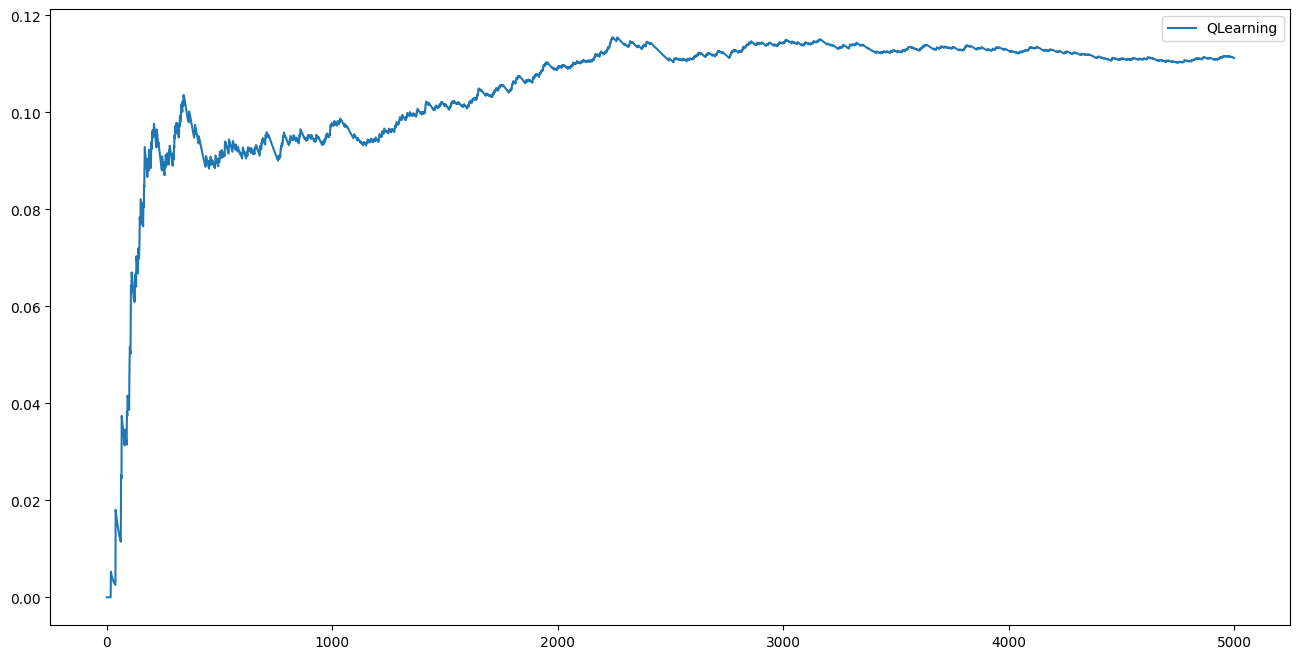

In [20]:
show_video()

os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_qlearning_lava.csv')

q_logs = pd.read_csv('./logs/rewards_qlearning_lava.csv', index_col=False).iloc[:, 1]
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.legend()